## Electricity Consumption Exploration

---

![](https://images.unsplash.com/photo-1487875961445-47a00398c267?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1650&q=80)
Photo by [Jason Blackeye](https://unsplash.com/photos/nyL-rzwP-Mk)

In this exercise, you will be asked to explore time series data in several ways.

You will be working with time series of Open Power System Data ([OPSD](https://open-power-system-data.org/)) for Germany. 

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017. 
```
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh
```

# Data Exploration

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
# Load file
data = pd.read_csv('opsd_germany_daily.csv')

data

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [3]:
# Description
print(data.describe())

       Consumption         Wind        Solar   Wind+Solar
count  4383.000000  2920.000000  2188.000000  2187.000000
mean   1338.675836   164.814173    89.258695   272.663481
std     165.775710   143.692732    58.550099   146.319884
min     842.395000     5.757000     1.968000    21.478000
25%    1217.859000    62.353250    35.179250   172.185500
50%    1367.123000   119.098000    86.407000   240.991000
75%    1457.761000   217.900250   135.071500   338.988000
max    1709.568000   826.278000   241.580000   851.556000


Then, make sure to transform the dates into datetime format in pandas :

In [4]:
# Transform the dates into datetime format
data = data.astype({'Date' : "datetime64[ns]"})

print(data['Date'])

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4378   2017-12-27
4379   2017-12-28
4380   2017-12-29
4381   2017-12-30
4382   2017-12-31
Name: Date, Length: 4383, dtype: datetime64[ns]


### 1. Plotting and understanding a time series

Q1 - Plot the different time series. What do you understand, what do you notice ?

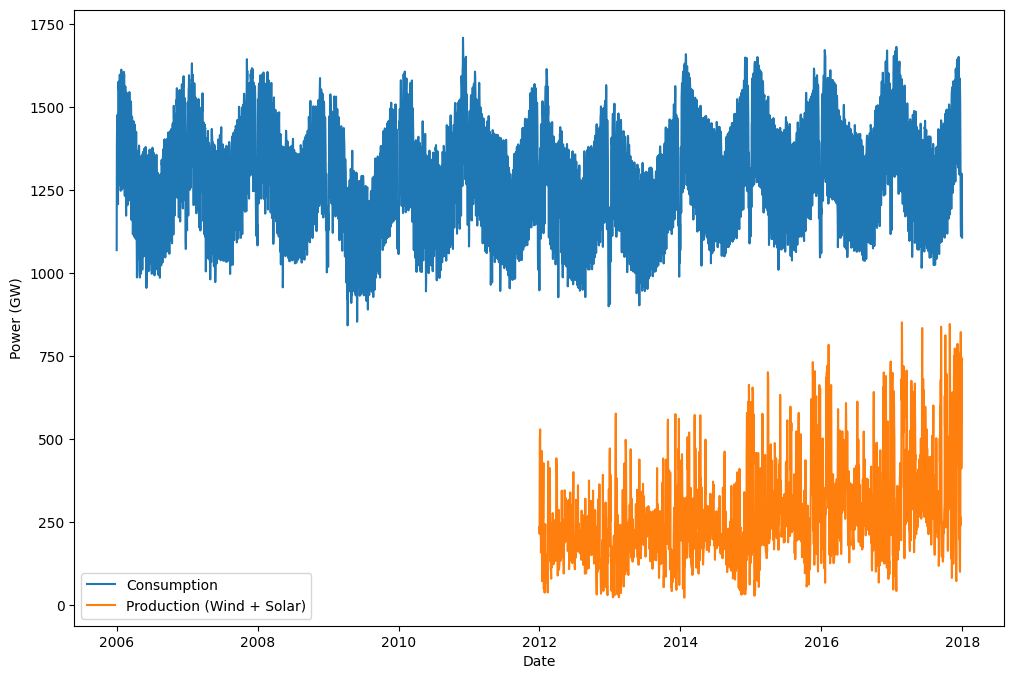

In [5]:
plt.figure(figsize=(12,8))
plt.plot(data['Date'],data['Consumption'])
plt.plot(data['Date'],data['Wind+Solar'])
plt.xlabel('Date')
plt.ylabel('Power (GW)')
plt.legend(labels = ['Consumption', 'Production (Wind + Solar)'])
plt.show()

# The power consumption is seasonalised, with small amounts of variance. It also slowly increases over time.


We can also avoid plotting lines and simply plot dots for the consumption :

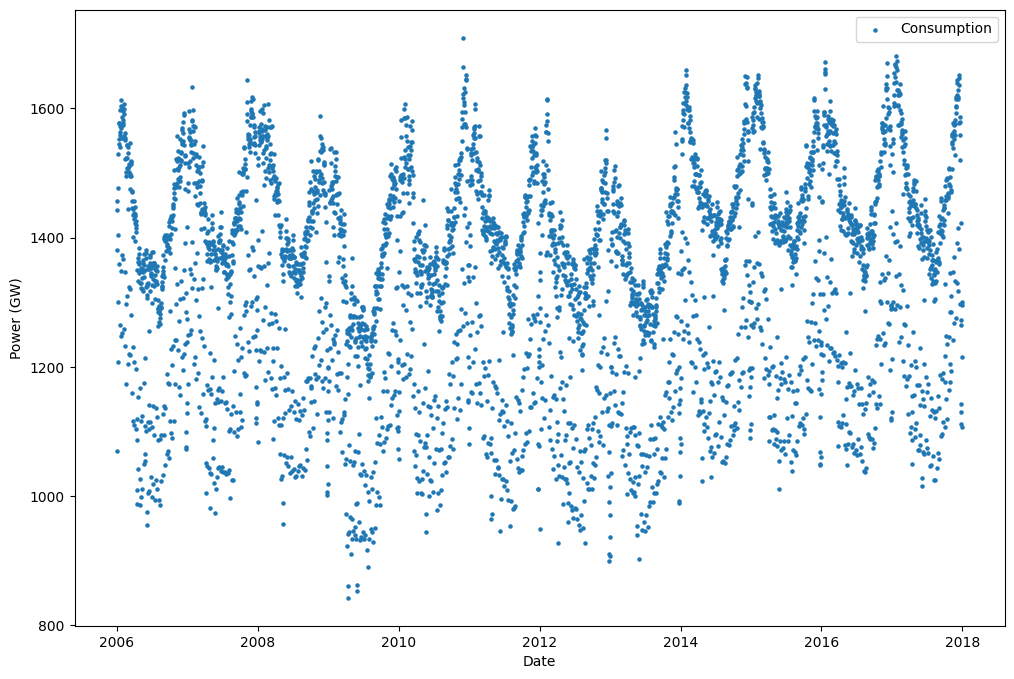

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(data['Date'],data['Consumption'], s=5)
plt.xlabel('Date')
plt.ylabel('Power (GW)')
plt.legend(labels = ['Consumption'])
plt.show()

And plot the production over time :

In [1]:
plt.figure(figsize=(12,8))
plt.plot(data['Date'],data['Solar'], color='orange')
plt.scatter(data['Date'],data['Wind'], s=3)
plt.xlabel('Date')
plt.ylabel('Power (GW)')
plt.legend(labels = ['Solar', 'Wind'])
plt.show()

NameError: name 'plt' is not defined

What can we notice ?
+ the consumption is larger than the production
+ we have no overall production data before 2012
+ the production and the consumption are both seasonal, i.e. they vary within a year given some pattern
+ there is a trend in production (the higher part), and outliers downwards

How do consumption and production compare ?
+ We notice that wind based production increases over time, and is rather high in winter (for example more storms).
+ The variance of wind generated power is extremely high
+ On the other hand, the solar production is higher in summer (seems logical)
+ Solar Panels suck in the winter
+ Germany needs a solid base load power source (Coal or Nuclear)
+ The consumption is higher in winter

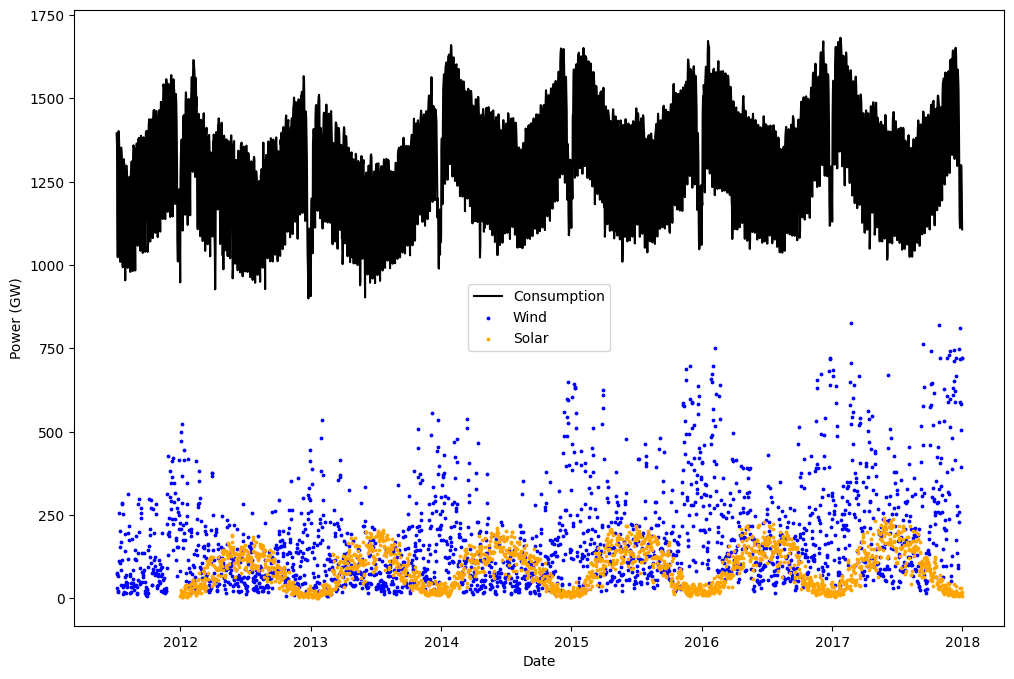

In [12]:
dataFilter = data.loc['2012-01':]

plt.figure(figsize=(12,8))
plt.plot(dataFilter['Date'],dataFilter['Consumption'], color='black')
plt.scatter(dataFilter['Date'],dataFilter['Wind'], s=3, color='blue')
plt.scatter(dataFilter['Date'],dataFilter['Solar'], s=3, color='orange')
plt.xlabel('Date')
plt.ylabel('Power (GW)')
plt.legend(labels = ['Consumption', 'Wind', 'Solar'])
plt.show()

### 2. Change the scale

Q2 - Try to change the scale to understand the recurrent patterns !

4383


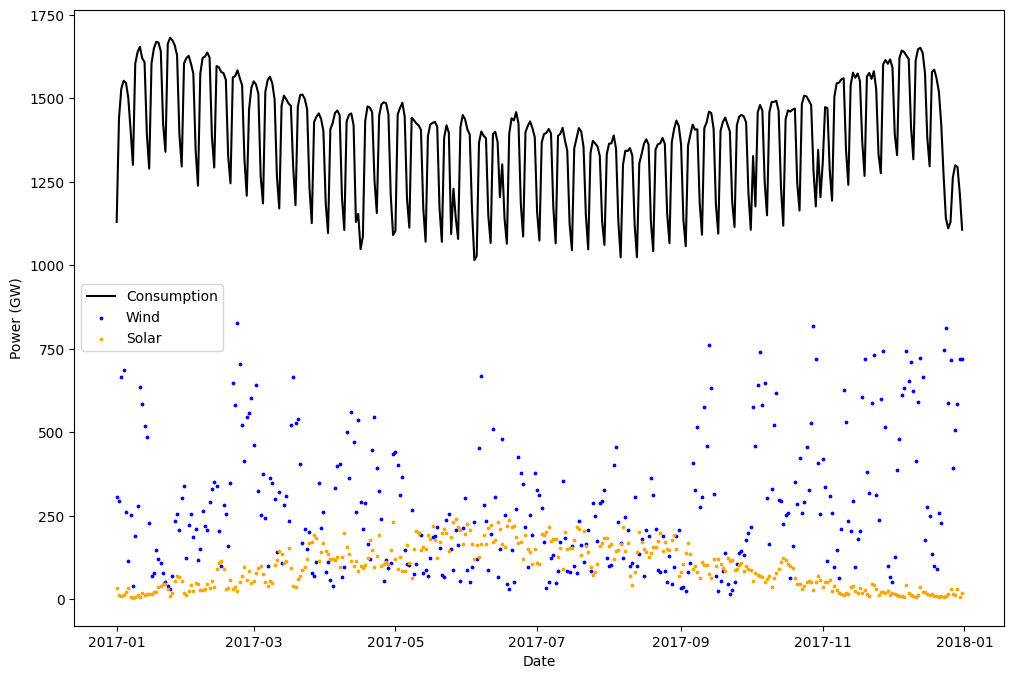

In [23]:
# Plot over the year
print(len(data))
dataYear = data[len(data) - 365: ]

plt.figure(figsize=(12,8))
plt.plot(dataYear['Date'],dataYear['Consumption'], color='black')
plt.scatter(dataYear['Date'],dataYear['Wind'], s=3, color='blue')
plt.scatter(dataYear['Date'],dataYear['Solar'], s=3, color='orange')
plt.xlabel('Date')
plt.ylabel('Power (GW)')
plt.legend(labels = ['Consumption', 'Wind', 'Solar'])
plt.show()


It confirms the trend : more consumption in winter time, and less in summer. We can then zoom on a given month :

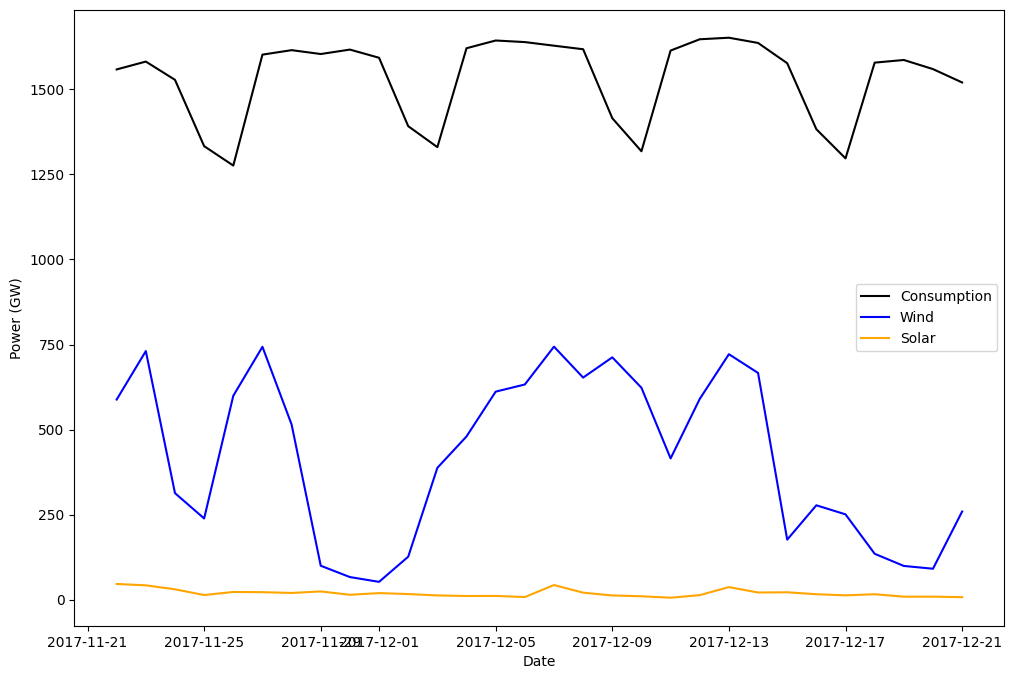

In [27]:
dataMonth = data[len(data) - 40: len(data) - 10]

plt.figure(figsize=(12,8))
plt.plot(dataMonth['Date'],dataMonth['Consumption'], color='black')
plt.plot(dataMonth['Date'],dataMonth['Wind'], color='blue')
plt.plot(dataMonth['Date'],dataMonth['Solar'], color='orange')
plt.xlabel('Date')
plt.ylabel('Power (GW)')
plt.legend(labels = ['Consumption', 'Wind', 'Solar'])
plt.show()

When zooming on a month, we oberve another seasonality. There seems to be days of the week in which people consume less. For example, here's what happens when we highlight Sundays :

2017-11-22 00:00:00


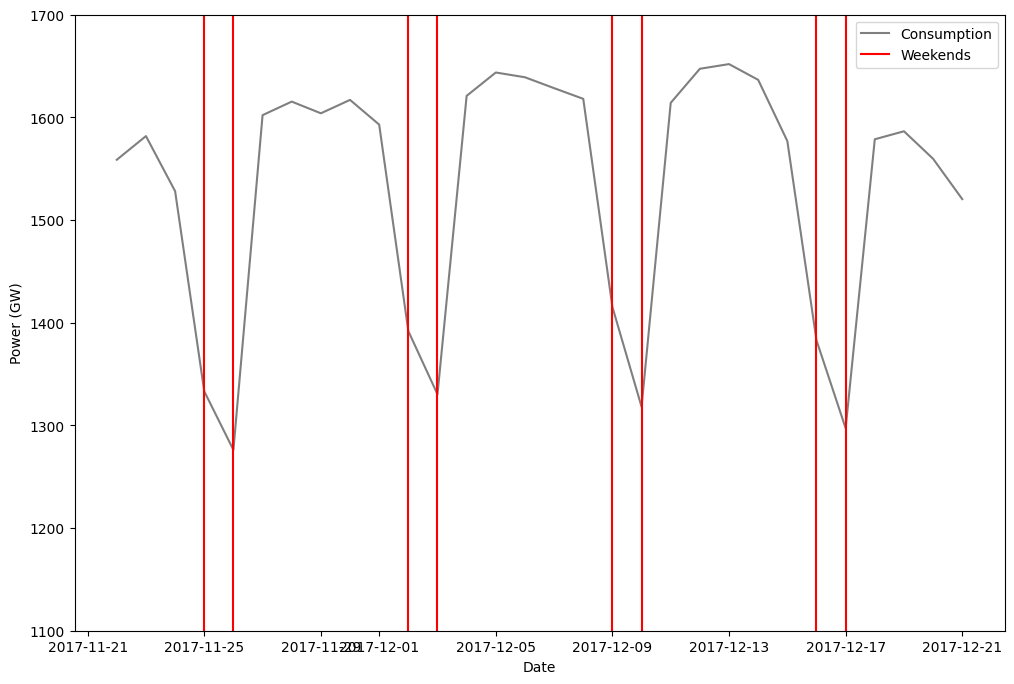

In [44]:
# Plot on Sundays
plt.figure(figsize=(12,8))

print(dataMonth['Date'][0])
plt.plot(dataMonth['Date'],dataMonth['Consumption'], color='#00000080')

x = [dataMonth['Date'][25], dataMonth['Date'][25]]
x2 = [dataMonth['Date'][18], dataMonth['Date'][18]]
x3 = [dataMonth['Date'][11], dataMonth['Date'][11]]
x4 = [dataMonth['Date'][4], dataMonth['Date'][4]]
x5 = [dataMonth['Date'][24], dataMonth['Date'][24]]
x6 = [dataMonth['Date'][17], dataMonth['Date'][17]]
x7 = [dataMonth['Date'][10], dataMonth['Date'][10]]
x8 = [dataMonth['Date'][3], dataMonth['Date'][3]]
y = [1750,0]
plt.plot(x,y, color='red')
plt.plot(x2,y, color='red')
plt.plot(x3,y, color='red')
plt.plot(x4,y, color='red')
plt.plot(x5,y, color='red')
plt.plot(x6,y, color='red')
plt.plot(x7,y, color='red')
plt.plot(x8,y, color='red')

plt.xlabel('Date')
plt.ylabel('Power (GW)')
plt.ylim(1100,1700)
plt.legend(labels = ['Consumption', 'Weekends'])
plt.show()

### 3. Further exploration

In [68]:
print(data['Date'][457].year)
data = data.drop('year', axis = 1)
data = data.drop('month', axis = 1)

2007


Q3 - To further explore the dataset, we might need to group the data. Create new columns for the consumption (by year and month), and create box-plots with seaborn. Comment on your results.

In [69]:
# new columns 'year' and 'month'
data['Year'] = [d.year for d in data.Date]
data['Month'] = [d.month for d in data.Date]

years = data['Year'].unique()
print(years)
data.head()

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,1
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,1
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,1
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,1
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,1


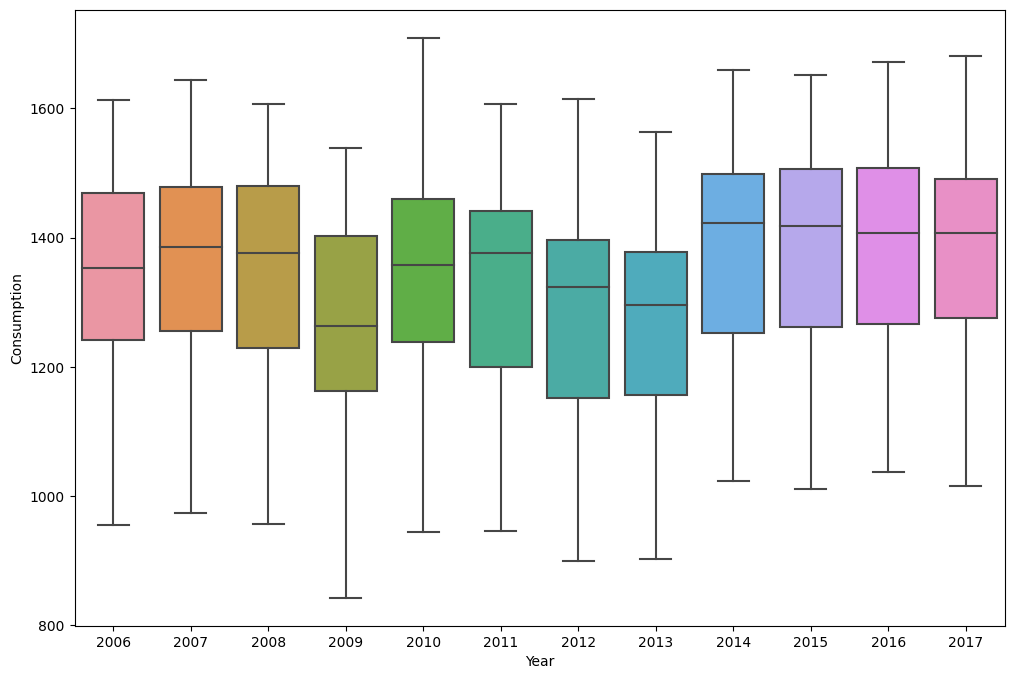

In [70]:
# Boxplot year
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(data=data, x=data['Year'], y = data['Consumption'])
plt.show()

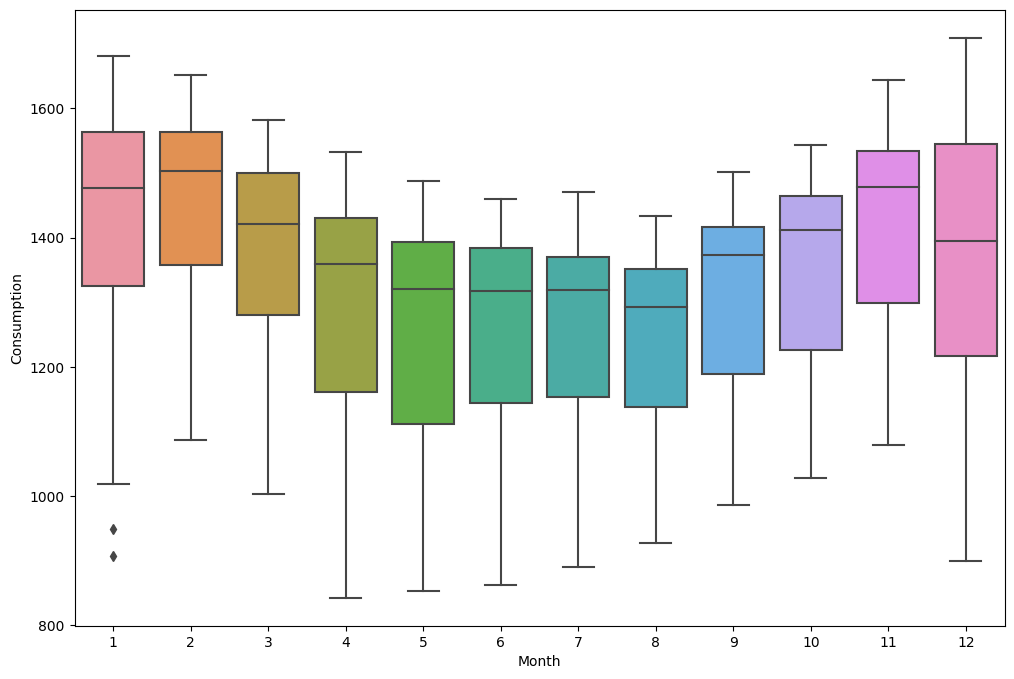

In [71]:
# Boxplot month
plt.figure(figsize=(12,8))
sns.boxplot(data=data, x=data['Month'], y = data['Consumption'])
plt.show()

### 4. Fill missing values

Q4 - Do you face missing values in production ? If yes, which method can you apply ? What happens if you plot the modified data ? It is a good idea to keep the data this way ?

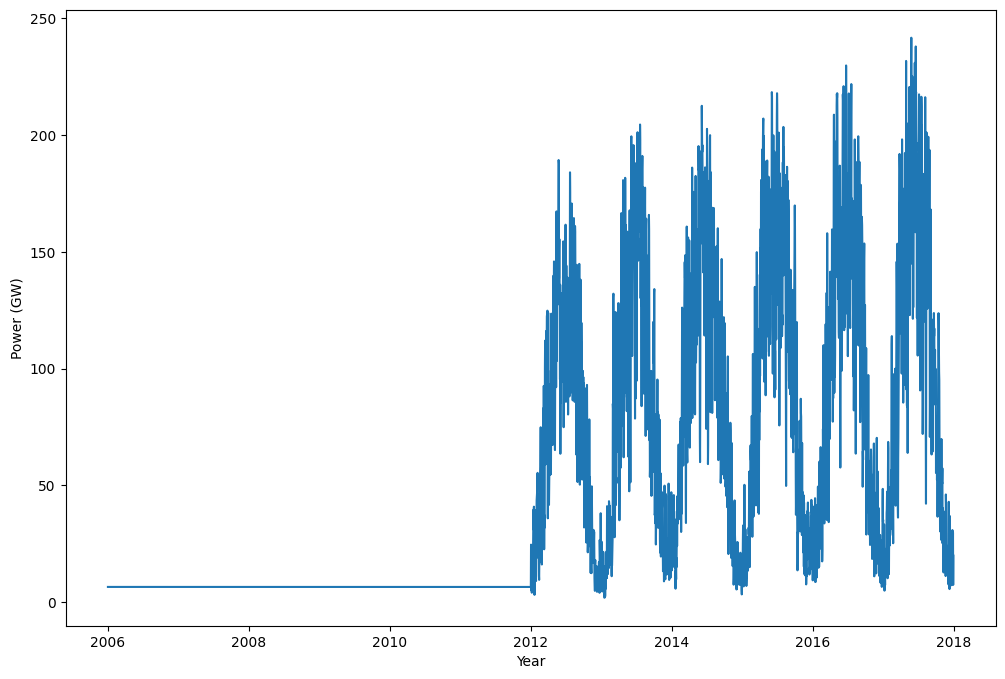

In [14]:
# Plot Solar
plt.figure(figsize=(12,8))
plt.plot(data['Date'], data['Solar'].bfill())
plt.xlabel('Year')
plt.ylabel('Power (GW)')
plt.show()

The forward and backward fill are useful when some values are missing within the data, not when we miss years of data. This is a clear illustration.

### 5. Series correlation

Q5 - A good way to explore time series, when you have several series, is to plot one series vs another. This is a good way to estimate the correlation between 2 series. Plot the relevant graphs (and compute the correlation) for wind + solar vs consumption, wind vs solar, wind vs consumption, and solar vs consumption.

In [104]:

# Correlation between consumption and overall production
correlation = data.corr(method='pearson')
correlation = correlation.unstack()
print(correlation['Consumption']['Wind+Solar'])

0.02764784385923743


C:\Users\Admin\AppData\Local\Temp\ipykernel_26764\2881652051.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr(method='pearson')


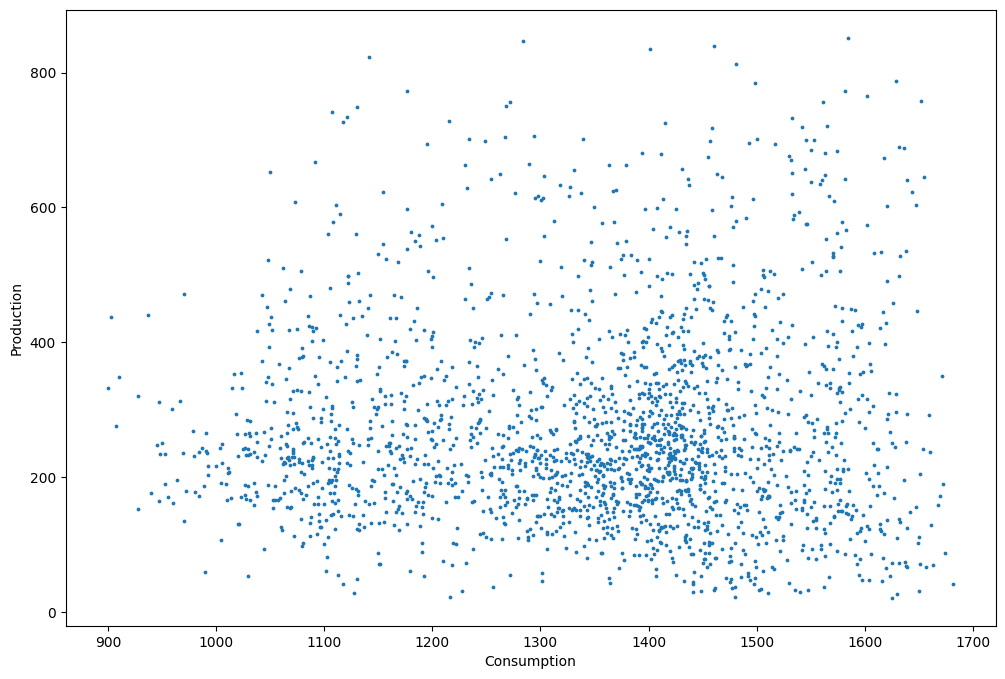

In [16]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(data['Consumption'], data['Wind+Solar'], s = 3)
plt.xlabel('Consumption')
plt.ylabel('Production')
plt.show()

In [97]:
# Correlation between solar production and wind production
print(correlation['Solar']['Wind'])

-0.10591360512824145


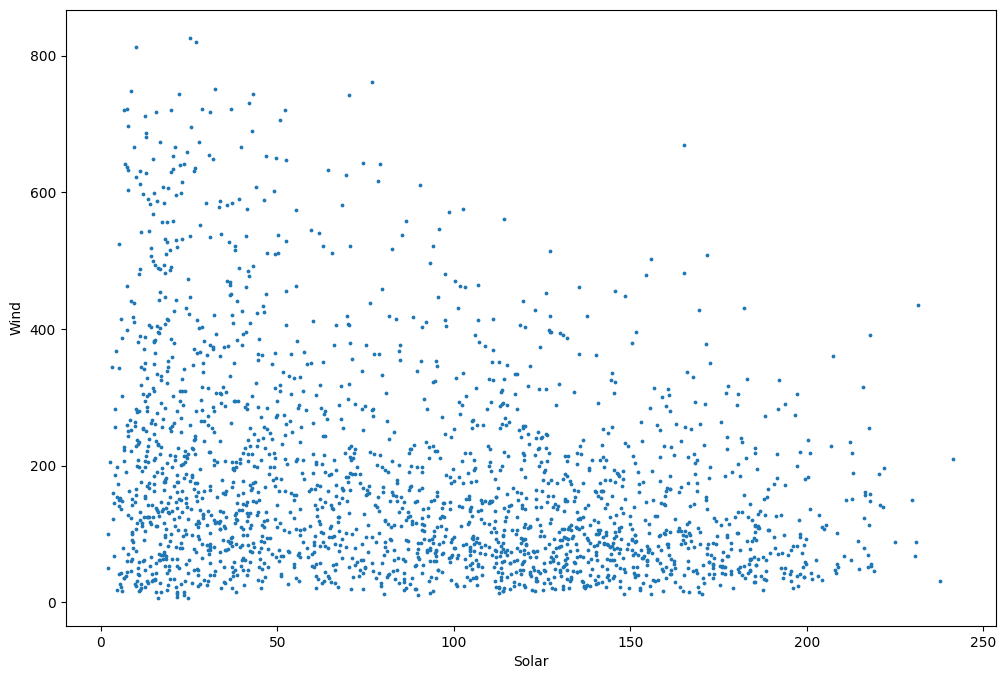

In [106]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(data['Solar'], data['Wind'], s = 3)
plt.xlabel('Solar')
plt.ylabel('Wind')
plt.show()

In [98]:
# Correlation between consumption and wind production
print(correlation['Consumption']['Wind'])

0.1368207580976623


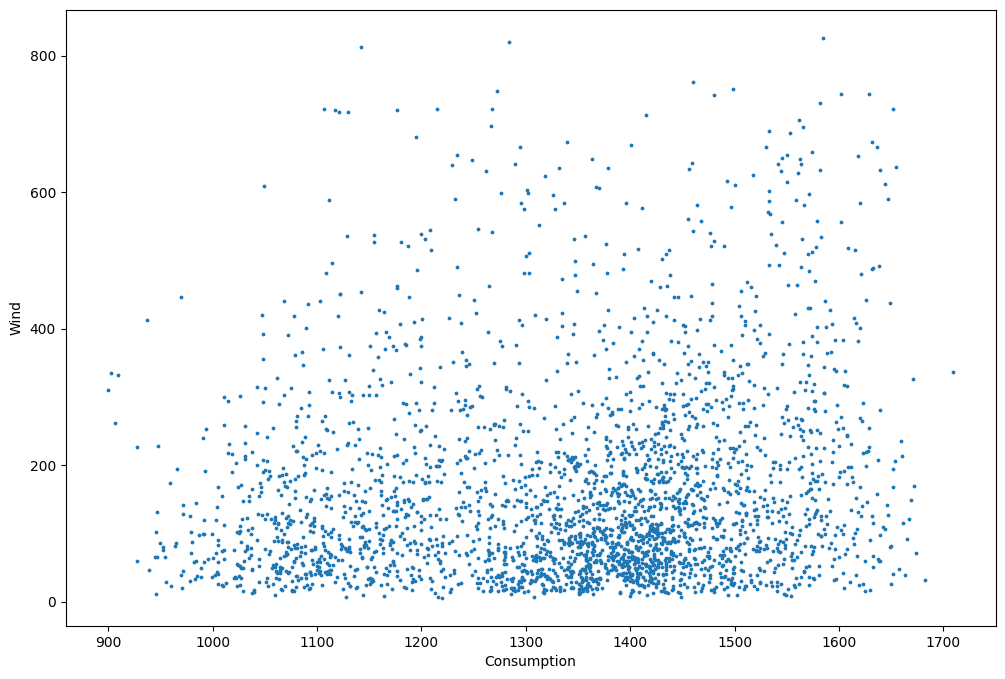

In [78]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(data['Consumption'], data['Wind'], s = 3)
plt.xlabel('Consumption')
plt.ylabel('Wind')
plt.show()

In [99]:
# Correlation between consumption and solar production
print(correlation['Consumption']['Solar'])

-0.10443726073021917


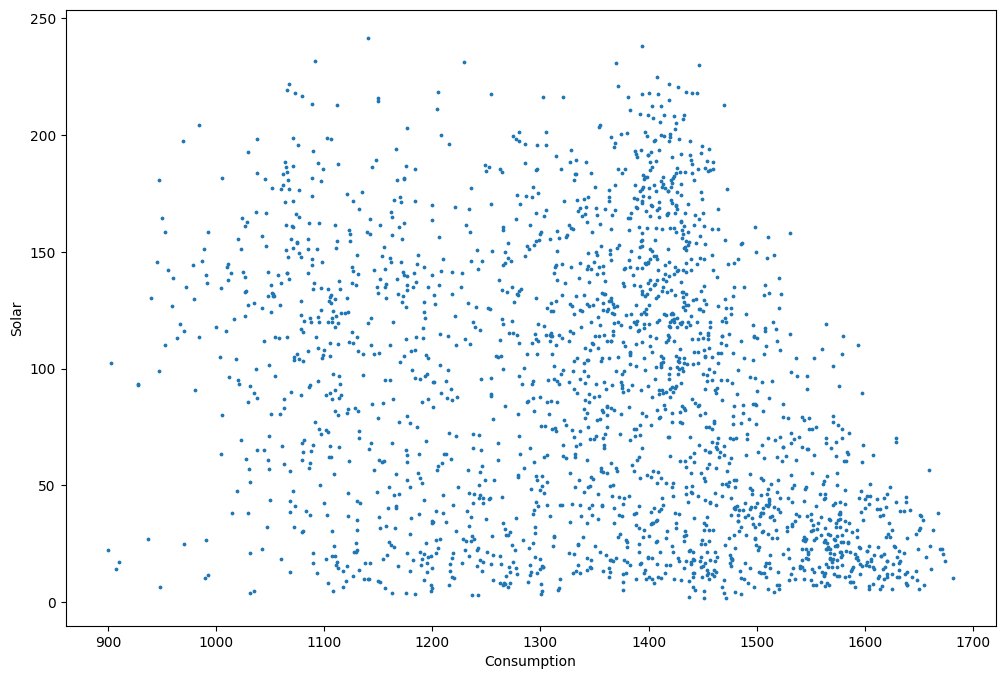

In [107]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(data['Consumption'], data['Solar'], s = 3)
plt.xlabel('Consumption')
plt.ylabel('Solar')
plt.show()